# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read Data

In [2]:
school_df = pd.read_csv('dataset/student-alcohol-consumption.csv')

In [3]:
school_df.head()

,Unnamed: 0,school,sex,age,famsize,Pstatus,Medu,Fedu,traveltime,failures,...,goout,Dalc,Walc,health,absences,G1,G2,G3,location,study_time
0,0,GP,F,18,GT3,A,4,4,2,0,...,4,1,1,3,6,5,6,6,Urban,2 to 5 hours
1,1,GP,F,17,GT3,T,1,1,1,0,...,3,1,1,3,4,5,5,6,Urban,2 to 5 hours
2,2,GP,F,15,LE3,T,1,1,1,3,...,2,2,3,3,10,7,8,10,Urban,2 to 5 hours
3,3,GP,F,15,GT3,T,4,2,1,0,...,2,1,1,5,2,15,14,15,Urban,5 to 10 hours
4,4,GP,F,16,GT3,T,3,3,1,0,...,2,1,2,5,4,6,10,10,Urban,2 to 5 hours


In [4]:
school_df['location'].value_counts()

Urban    307
Rural     88
Name: location, dtype: int64

In [5]:
parameters = ['school','sex', 'age','famsize', 'Pstatus','Medu', 'Fedu', 'traveltime', 'failures']

In [6]:
school_df.groupby('location')['school','sex', 'age','famsize', 'Pstatus','Medu', 'Fedu', 'traveltime', 'failures'].mean()

F:\4.yil_birinci_dnem\Data Science\data\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,age,Medu,Fedu,traveltime,failures
location,,,,,
Rural,17.045455,2.465909,2.375000,1.875000,0.443182
Urban,16.596091,2.830619,2.563518,1.325733,0.302932


In [7]:
school_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  395 non-null    int64 
 1   school      395 non-null    object
 2   sex         395 non-null    object
 3   age         395 non-null    int64 
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   traveltime  395 non-null    int64 
 9   failures    395 non-null    int64 
 10  schoolsup   395 non-null    object
 11  famsup      395 non-null    object
 12  paid        395 non-null    object
 13  activities  395 non-null    object
 14  nursery     395 non-null    object
 15  higher      395 non-null    object
 16  internet    395 non-null    object
 17  romantic    395 non-null    object
 18  famrel      395 non-null    int64 
 19  freetime    395 non-null    int64 
 20  goout     

In [8]:
school_df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,395.0,197.00,114.17,0.0,98.5,197.0,295.5,394.0
age,395.0,16.70,1.28,15.0,16.0,17.0,18.0,22.0
Medu,395.0,2.75,1.09,0.0,2.0,3.0,4.0,4.0
Fedu,395.0,2.52,1.09,0.0,2.0,2.0,3.0,4.0
traveltime,395.0,1.45,0.70,1.0,1.0,1.0,2.0,4.0
failures,395.0,0.33,0.74,0.0,0.0,0.0,0.0,3.0
famrel,395.0,3.94,0.90,1.0,4.0,4.0,5.0,5.0
freetime,395.0,3.24,1.00,1.0,3.0,3.0,4.0,5.0
goout,395.0,3.11,1.11,1.0,2.0,3.0,4.0,5.0
Dalc,395.0,1.48,0.89,1.0,1.0,1.0,2.0,5.0


<AxesSubplot:xlabel='school', ylabel='count'>

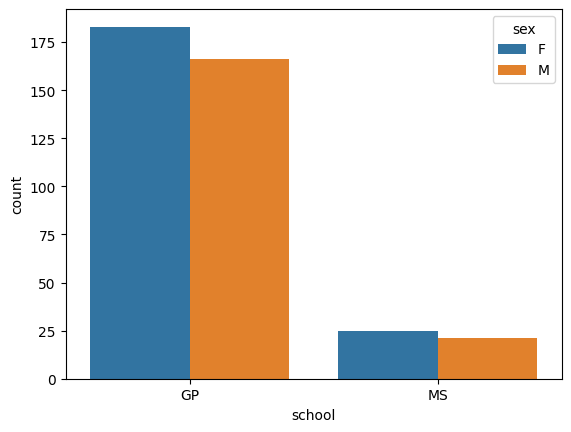

In [9]:
sns.countplot(data=school_df, x=school_df['school'], hue='sex')

In [10]:
school_df.groupby('school')[parameters+['Dalc', 'Walc']].mean().round(2)

,age,Medu,Fedu,traveltime,failures,Dalc,Walc
school,,,,,,,
GP,16.52,2.80,2.55,1.39,0.32,1.44,2.26
MS,18.02,2.35,2.28,1.91,0.46,1.76,2.52


In [11]:
school_df.isnull().values.sum()

0

In [12]:
school_df.drop('Unnamed: 0', axis=1, inplace=True)

## Visualization Data

Text(0, 0.5, 'Ferquency')

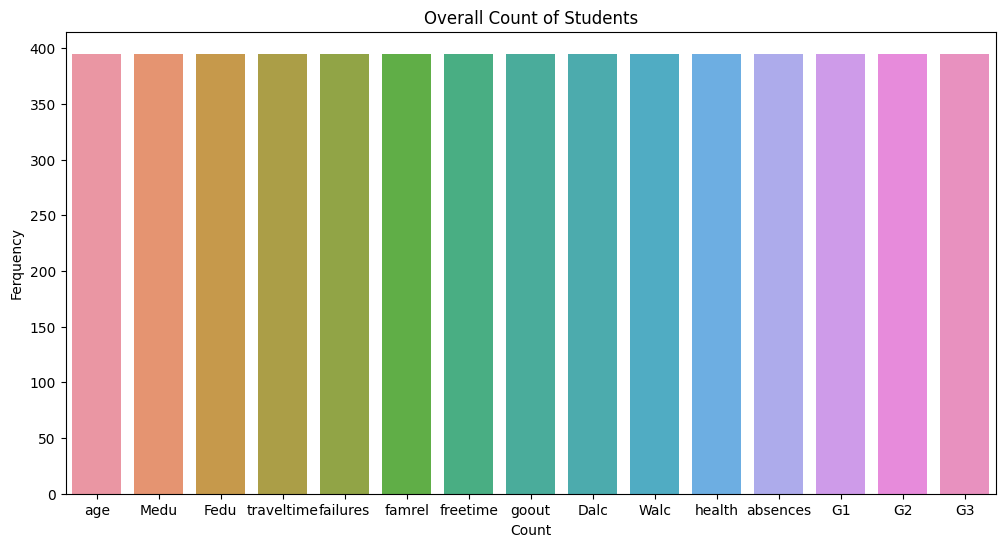

In [13]:
plt.figure(figsize=(12, 6))
plt.title("Overall Count of Students")
sns.countplot(data=school_df)
plt.xlabel("Count")
plt.ylabel("Ferquency")

([<matplotlib.patches.Wedge at 0x146bbb63908>,
 [Text(-0.09175509895664602, 1.096166502779325, 'F'),
  Text(0.09175520158716051, -1.096166494188588, 'M')],
 [Text(-0.050048235794534185, 0.5979090015159955, '52.7%'),
  Text(0.05004829177481482, -0.5979089968301389, '47.3%')])

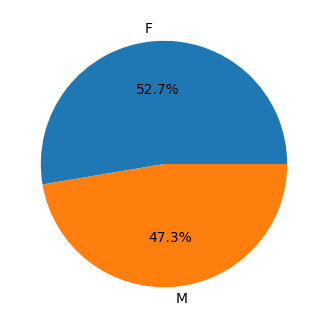

In [14]:
gender_count = school_df['sex'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%')

Text(0.5, 1.0, 'Pearson Correlation Matrix')

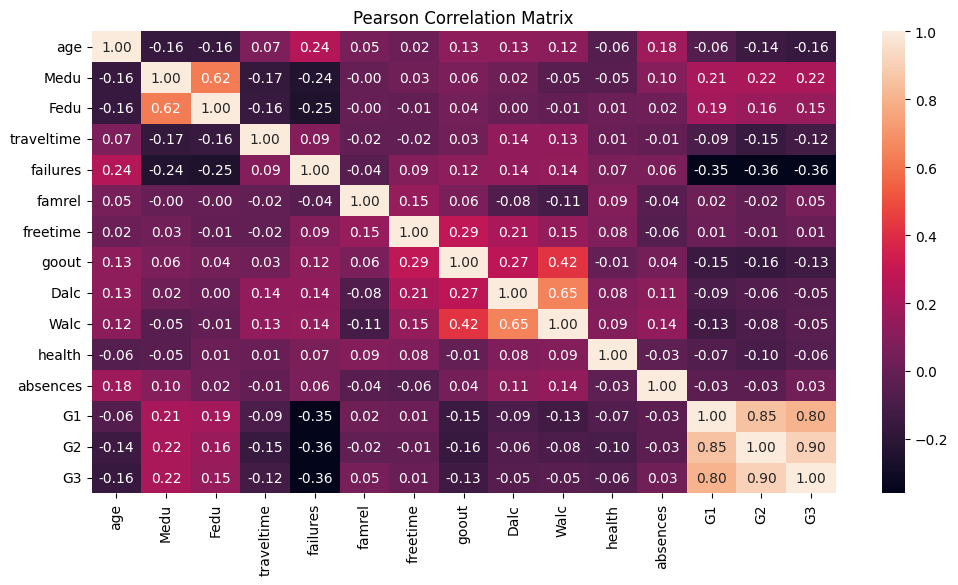

In [18]:
corr = school_df.corr(method='pearson')
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.title('Pearson Correlation Matrix')